<a href="https://colab.research.google.com/github/ThanZawWin-TZW/CNN/blob/main/208107B_Than_Zaw_Win.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=”BLUE”> **IMAGE CLASSIFIER WITH CIFAR-10 DATASET** </font>

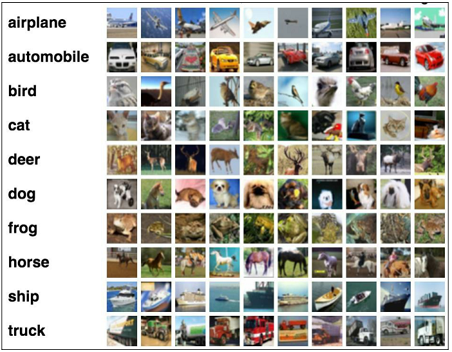

In this project, I will explore the CIFAR-10 dataset and implement Convolutional Neural Network to classify images into 10 categories: 

airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 

This will be followed in a step by step analysis report from the historical data and its implementation in future.

#Table of interest:

##1.Introduction

##2.Import and Preprocess the data

  2.1 Import all required libraries

  2.2 Load and preproces of data

  2.3 Explore the data

  2.4 Preprocessing of data

##3.Model Building 

  3.1 Defining the model architecture Using ConVnets

  3.2 Training Model

  3.3 Check accuracy score

  3.4 Hyperparameter tuning

##4.Evaluate the model

  4.1 Training and validations cuvre

  4.2 Score trained model and prediction.

  4.3 Confusion matrix.

  4.4 Classification report.

  4.5 Check for the predictions.

##5.Conclusion
##6.Reference

##1. Introduction
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images. This image taken from the CIFAR repository ( https://www.cs.toronto.edu/~kriz/cifar.html ). This is a classification problem with 10 classes(muti-label classification)

##<font color=”BLUE”> **2.Import and Preprocess the data** </font>






### <font color=”BLUE”> **2.1.Import required Libraries** </font>

> To start, load in several helpful packages .


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD,Adam,RMSprop,Adagrad
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

### <font color=”BLUE”> **2.2. Load and preproces of data** </font>

> Now let's load and prepare CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

### <font color=”BLUE”> **2.3. Explore the data** </font>

> In this step, we check the shape of the training and testing data and visualize the distribution of data.


In [ ]:
print ('x_train shape:',x_train.shape)  # x_train is the dataset of 32x32 color images of objects that the model will be trained on.
print ('y_train shape:',y_train.shape)  # y_train is the dataset of labels that correspond to x_train.
print ('x_test shape:',x_test.shape)    # x_test is the dataset of 32x32 color images of objects that the model will be tested on.
print ('y_test shape:',y_test.shape)    # y_test is the dataset of labels that correspond to x_test.

> Checking the maximum and minimum value of the pixels that form the cifar10 images



In [ ]:
print (np.max(x_train))
print (np.min(x_train))

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load("cifar10", with_info=True) 
print(info)

In [ ]:
fig = tfds.show_examples(info, dataset["train"])

*   The output show some of the images from our dataset.



> Visualize distribution of train and test image in our dataset




In [ ]:
Classes = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
  
fig, axs = plt.subplots(1,2,figsize=(25,8)) 
# Count plot for training set

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set(xticklabels=Classes)
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set(xticklabels=Classes)
axs[1].set_xlabel('Classes')

plt.show()

*   Each classe contain exacly 6000 examples( 5000 for training and 1000 for test)








### <font color=”BLUE”> **2.4. Preprocessing of data** </font>

Before building any CNN model, it is important to preprocess the data.

*   Normalization of the training samples
*   Label Encoding




> **Normalization of the training samples**

Models generally run better on normalized values. We will now scale each image with pixel values between(0,255) to values between (0,1)



In [ ]:
#Data Normalization (normalize data range between 0-1)
x_train = x_train.astype("float") / 255.0
x_test = x_test.astype("float") / 255.0

>**Label Encoding**

Transform the labels into one-hot encodings.




In [ ]:
#Data Categorization
y_train = keras.utils.to_categorical(y_train, len(Classes))
y_test = keras.utils.to_categorical(y_test, len(Classes))

##<font color=”BLUE”> **3.Model Building** </font>

> In this step, we will build Convolutional Neural Network for Image classification.First, we create the base model for our neural network where we will define functions for the training process and validation process.


### <font color=”BLUE”> **3.1. Defining the model architecture Using ConVnets** </font>




> **Let's create base model with CNN model architecture and hyperparameters as below.**
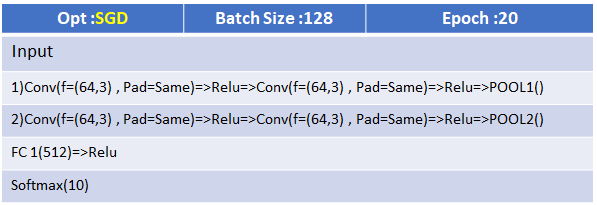



In [ ]:
#Build Model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

> **Define batch_size, num_classes, and epochs.**



In [ ]:
batch_size = 128 #the total number of images passed to the model per iteration.
epochs = 20   # number of samples to be used for each gradient update
num_classes = 10

In [ ]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


### <font color=”BLUE”> **3.2. Training Model** </font>


In [ ]:
model_log = model.fit(x_train, y_train, 
                      batch_size=batch_size, 
                      epochs=epochs, 
                      validation_split = 0.1,
                      )

### <font color=”BLUE”> **3.3. Check accuracy score** </font>

> 



In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Train loss:', score1[0])
print('Test Acc:', score[1])
print('Train Acc:', score1[1])


We can plot our model accuracy and loss to get better perspective

In [ ]:
from matplotlib.ticker import MaxNLocator

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

**<font color=”navy”> Results => train_loss: 0.8530 - train_accuracy: 0.7061 - val_loss: 1.1139 - val_accuracy: 0.6104** </font>



---



### <font color=”BLUE”> **3.4. Hyperparameter tuning** </font>



To improve our model  accuracy, we try following hyperparamert turning step
*   Change Optimizers(SGD, RMSprop, Adagrad, Adam)
*   Modify model architecture (Change no. of convolution layers,Change no. of filter, Change different filter size )
*   Add Dropout for regularization
*   Add batch normalization
*   Change Batch Size
*   Change Eopch
*   Use Learning Rate Schedule and tune with different learning rate and change LRS Step Decay Factor










> **Tuning Model (1) Changed optimizer (With RMSprop)**
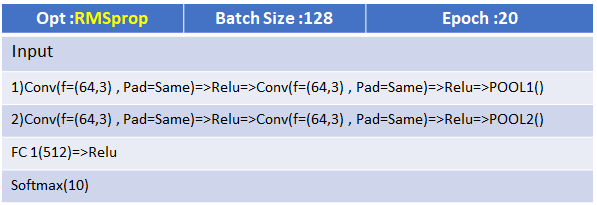

As the first hyperparameter tuning for this project, We use the same architecture as our previous models here with different optimizer (RMSprop).


In [ ]:
#@title
#Build Model
model = Sequential()


model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
#@title
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
#@title
#Model Complie
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
#@train model
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,' Train Acc:', score1[1])


In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy (RMSprop) on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (1)=> train_loss: 0.0482 - train_accuracy: 0.9866 - val_loss: 2.3592 - val_accuracy: 0.7700** </font>

(Model is overfitting)



>**Tuning Model (2)Changed optimizer (With Adagrad)**
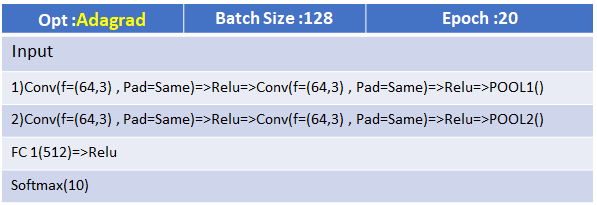

In [ ]:
#@title
#Build Model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
#@title
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
#@title
model.compile(optimizer='Adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy (Adagrad) on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (2)=>train_loss: 1.4059 - accuracy: 0.5042 - val_loss: 1.4274 - val_accuracy: 0.4900** </font>

(val_accuracy is low)



> **Tuning Model (3)Change optimizer (With Adam)**
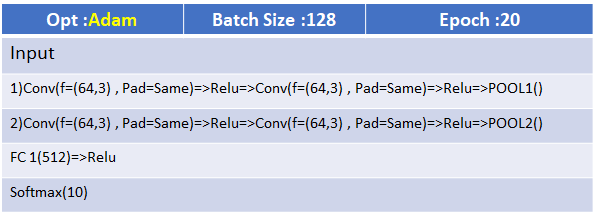


In [ ]:
#@title
#Build Model
model = Sequential()


model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
#@title
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy (Adam) on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results(3)=>train_loss: 0.0349 - accuracy: 0.9883 - val_loss: 1.8739 - val_accuracy: 0.7490**

(Looks like our model is still overfitting, based on the training and validation accuracy values.)



---






> **Tuning Model (4)Modify model architecture**(**Change no. of convolution layers**, Change different filter size )
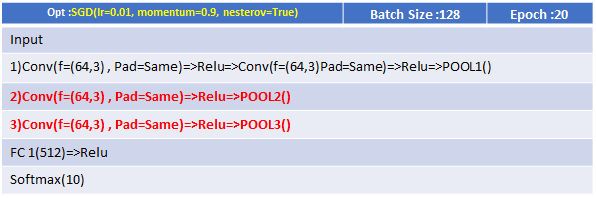
  
  By changing 4 optimizer (SGD,RMSprop,Adagrad and Adam), I got better accuracy with SGD optimizer.


In this step I will **modify network architecture (Conv layers) with SGD (lr0.01)** to improve upon the model.

 







In [ ]:
#@title
#Build Model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 20 
batch_size = 128
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_data=(x_test, y_test) 
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 4 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (4)=>train_loss: 0.0755 - accuracy: 0.9742 - val_loss: 1.4475 - val_accuracy: 0.7480** 

(The results show that we still end up overfitting the model, based on the training and validation accuracy values.)



---





> **Tuning (5)Modify model architecture** (Change no. of convolution layers, **Change no. of filter**,Change different filter size)
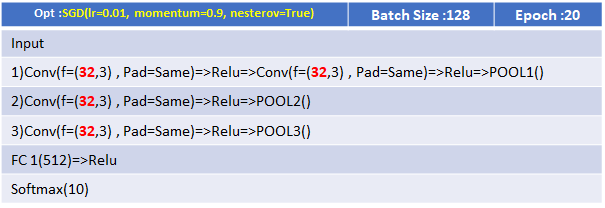

In this time I will change no. of filters 64 to 32 (Reduced)

In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 20 
batch_size = 128
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1 
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 5 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results(5)=>train_loss: 0.2408 - train_accuracy: 0.9128 - val_loss: 1.0618 - val_accuracy: 0.7400**



> **Tuning Model(6)Modify model architecture** (Change no. of convolution layers, Change no. of filter ,**Change different filter size** )
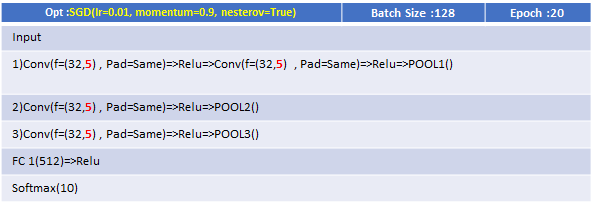

Changed filter size (3,3) to (5,5)

In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 20 
batch_size = 128
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1 
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 6 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (6)=> train_loss: 0.2435 - trainaccuracy: 0.9128 - val_loss: 1.0833 - val_accuracy: 0.7330** 

(still overfit So, what we do next is add dropout & BN )



> **Tuning Model(7) Add Dropout for regularization and Batch Normalization**
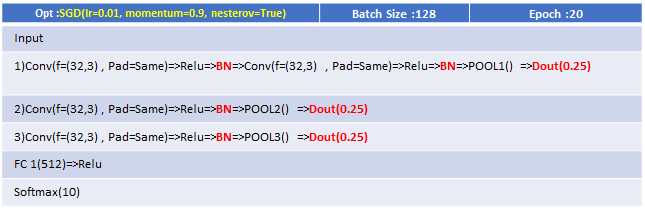



To solve overfit problem, we will add dropout after hidden dense layer to enable regularization.Beside this change back filter size (3,3)

In [ ]:
#@title
#Build Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 20 
batch_size = 128
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                      validation_split = 0.1 
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 7 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (17)=>train_loss: 0.3383 - train_accuracy: 0.8863 - val_loss: 0.6471 - val_accuracy: 0.7804**

(Now the results are better )



> **Tuning Model (8) Change Epoch**
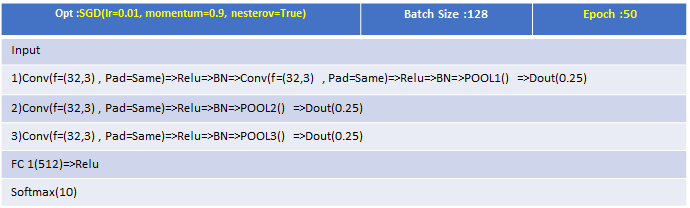

In [ ]:
#@title
#Build Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


In [ ]:
#@title
epochs = 50 
batch_size = 128
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                       validation_split = 0.1
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 8 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (8)=> train_loss: 0.4592 - train_accuracy: 0.8337 - val_loss: 0.6199 - val_accuracy: 0.8006** 



> **Tuning Model (9)Change Batch Size**
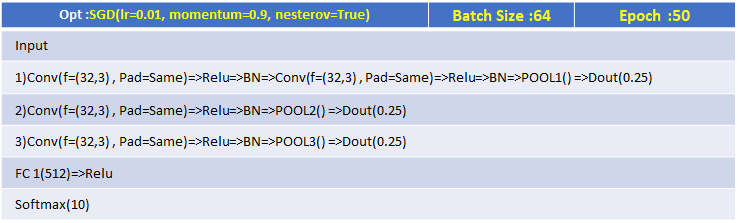

Change batch size = 128 to 64

In [ ]:
#@title
#Build Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 50 
batch_size = 64
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, 
                      epochs=epochs,                      
                       validation_split = 0.1
                     )

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 9 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (9)=> train_loss: 0.8431 - train_accuracy: 0.7512 - val_loss: 0.7663 - val_accuracy: 0.7774**

> **Tuning Model (10). Add Learning Rate Schedules (Step Decy)**
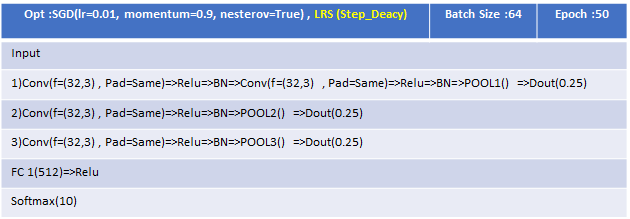


In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
def step_decay(epoch):
	initAlpha = 0.01
	factor = 0.25
	dropEvery = 5

	alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
	return float(alpha)

In [ ]:
#@title
callbacks = [LearningRateScheduler(step_decay)]

In [ ]:
#@title
epochs = 50 
batch_size = 64
num_classes = 10
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True,
                      callbacks= callbacks)

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 10 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (10) = train_loss: 0.8246 - train_accuracy: 0.7238 - val_loss: 0.7132 - val_accuracy: 0.7714** 

> **Tuning Model (11).Change Learning rate = 0.1**
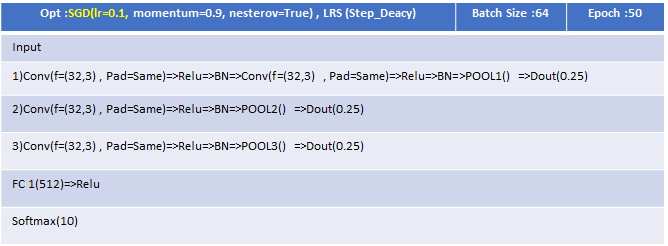


In this step learning rate = **0.01** to **0.1**

In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 50
batch_size = 64
num_classes = 10
opt = SGD(lr=0.1, momentum=0.9, nesterov=True)

In [ ]:
#@title
def step_decay(epoch):
	initAlpha = 0.1
	factor = 0.25
	dropEvery = 5

	alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
	return float(alpha)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True,
                      callbacks= callbacks)

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,'  Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 11 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (11)=>train_loss: 0.7305 - train_accuracy: 0.7573 - val_loss: 0.6523 - val_accuracy: 0.7872**


> **Tuning Model (12).Change Learning rate = 0.001**
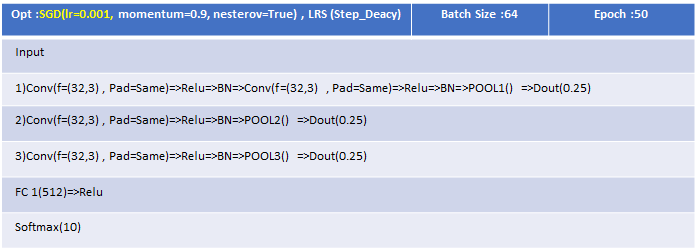



In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 50
batch_size = 64
num_classes = 10
opt = SGD(lr=0.001, momentum=0.9, nesterov=True)

In [ ]:
#@title
def step_decay(epoch):
	initAlpha = 0.001
	factor = 0.5
	dropEvery = 5

	alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
	return float(alpha)


In [ ]:
#@title
callbacks = [LearningRateScheduler(step_decay)]

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True,
                      callbacks= callbacks)

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,' Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 12 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (12)=>train_loss: 0.8736 - train_accuracy: 0.7012 - val_loss: 0.0.8998 - val_accuracy: 0.6859**


> **Tuning Model (13).Change LRS Step Decay Factor**
 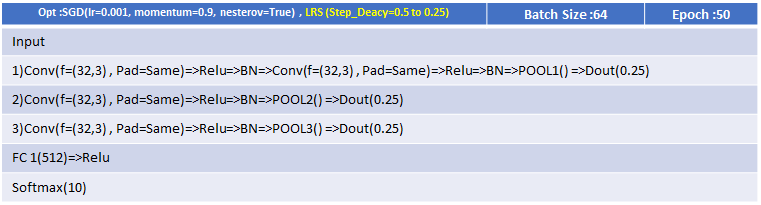

 Change LRS step deacy factor=0.5 to 0.25

In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 50
batch_size = 64
num_classes = 10
opt = SGD(lr=0.001, momentum=0.9, nesterov=True)

In [ ]:
#@title
def step_decay(epoch):
	initAlpha = 0.001
	factor = 0.25
	dropEvery = 5

	alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
	return float(alpha)

In [ ]:
#@title
callbacks = [LearningRateScheduler(step_decay)]

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True,
                      callbacks= callbacks)

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,' Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 13 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (13)=>train_loss: 0.9791 - accuracy: 0.6549 - val_loss: 0.8817 - val_accuracy: 0.6962**

>**Tuning Model (14). Change Optimizer SGD to Adam (lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)**
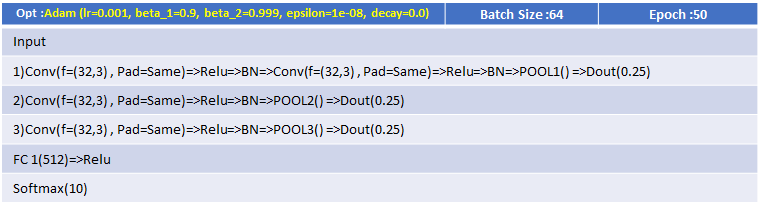


In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [ ]:
#@title
epochs = 50
batch_size = 256
num_classes = 10
opt = Adam (lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [ ]:
#@title
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True)

In [ ]:
#@title
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,' Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

In [ ]:
#@title
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), model_log.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), model_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), model_log.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), model_log.history["val_accuracy"], label="val_accuracy")
plt.title("Loss and Accuracy 14 on CIFAR-10")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend()

<font color=”navy”> **Tuning Results (14)=>train_loss: 0.7885 - train_accuracy: 0.7377 - val_loss: 0.6946 - val_accuracy: 0.7716**

#**Final Model**

**It's time now for built the final model and evaluate it.In this final model we built with previous model archi and ecpoch =100 ,batch size=32 , EarlyStopping and ModelCheckpoint.**

In [ ]:
#@title
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

* Plot model architecture

In [ ]:
keras.utils.plot_model(model)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
epochs = 100
batch_size = 32
num_classes = 10
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [ ]:
filepath = "my_model1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
EarlyStopping =EarlyStopping(monitor='loss', patience=2)
callbacks=[checkpoint,EarlyStopping]

In [ ]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_log = model.fit(x_train, y_train, 
                      validation_split = 0.1,
                      batch_size=batch_size, 
	                    epochs=epochs, 
                      verbose=1 ,
											shuffle=True,
                      callbacks= callbacks)

##<font color=”BLUE”> **4.Evaluate the Model** </font>

### <font color=”BLUE”> **4.1 Training and validations cuvre** </font>


In [ ]:
from matplotlib.ticker import MaxNLocator

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### <font color=”BLUE”> **4.2 Score trained model and prediction.** </font>

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
score1=model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0] ,' Test Acc:', score[1])
print('Train loss:', score1[0] ,'Train Acc:', score1[1])

<font color=”brown”>**Final Model Results => train_loss: 0.6108 - train_accuracy: 0.8136 - val_loss: 0.6191 - val_accuracy: 0.8172**



---



### <font color=”BLUE”> **4.3 Confusion Matrix** </font>

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=Classes, yticklabels=Classes)

By plotting the confusion matrix. We see that our model classifies frogs pretty well, with 955 out of the 1000 ship images heving been classified correctly. We can also see that there is relatively high confusion between cats and dogs.

### <font color=”BLUE”> **4.4 Classification Report** </font>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

### <font color=”BLUE”> **4.5 Check for the predictions** </font>

Now we check our prediction with the true lable

In [ ]:
R = 5
C = 4
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (Classes[y_true[i]], Classes[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)



##<font color=”BLUE”> **5.Conclusion** </font>

> In this project , we have implemented  16 different Convolutional Neural Network model with CIFAR-10 dataset to classify images into 10 categories:
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Our best model is Final Model with Adam optimizer (lr 0.001) ,which give us a model accuracy 84% and we can see that our model classifies frogs pretty well, with 938 out of the 1000 frog images heving been classified correctly. We can also see that there is relatively high confusion between cats and dogs.




##<font color=”BLUE”> **6.Refrances** </font>


*   https://www.cs.toronto.edu/~kriz/cifar.html
*   https://keras.io/api/callbacks/
*   https://keras.io/api/optimizers/
*   https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer
*   www.kaggle.com/amyjang/tensorflow-cifar10-cnn-tutorial
*   https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a



